In [ ]:
#@title The MIT License (MIT)
#
# Copyright (c) 2025 Eric dos Santos.
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.

# Predicting Home Values ​​in Boston

In this notebook, a **linear regression** model was built using the **"Boston Housing"** dataset, which contains information on various characteristics of housing in Boston and their market prices. The objective of this work is to predict the median home value (MEDV) based on several independent variables, such as the crime rate (CRIM), the number of bedrooms (RM), the proximity to employment centers (DIS), among others.

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ericshantos/playground/blob/main/projects/boston_housing/boston_housing_forecast.ipynb
"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Runs in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ericshantos/playground/blob/main/projects/boston_housing/boston_housing_forecast.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View the code on GitHub</a>
  </td>
</table>

## Análise exploratória de Dados

### Visão geral do código python

O script começa importando as bibliotecas Python necessárias para manipulação de dados, cálculos numéricos e visualização.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

The dataset is read from a CSV file into a Pandas DataFrame.

The file path is specified as a string.

In [ ]:
import kagglehub
import pandas as pd

# Download the latest version of the "bostonhousingdataset" dataset available on Kaggle
# The return of the `dataset_download` function is the path where the dataset files were downloaded.
path = kagglehub.dataset_download("simpleparadox/bostonhousingdataset", "boston-housing-dataset.csv")

# Load the CSV file "boston-housing-dataset.csv" into a pandas DataFrame.
# The file path is constructed using the `path` variable that contains the download directory.
df = pd.read_csv(path)

# Ensure that column names in the DataFrame are treated as strings.
df.columns = df.columns.astype(str)

### Dataset information

In [ ]:
# Displays general information about the DataFrame, including:
# - Total number of entries
# - Number of non-null values ​​in each column
# - Data type of each column
print('Dataset information: \n')
df.info()

Informações do dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


Based on the initial analysis of the dataset, it was clear that it is well structured, with all columns filled in and no missing values, which greatly facilitates the analysis and modeling work. Since the variables are mostly numeric, I can proceed directly to statistical analyses and correlations without the need for complex pre-processing, such as coding categorical variables.

### Analyze Correlations Between Variables

Correlation measures the linear relationship between two variables. In Pandas, the corr() method calculates a correlation matrix for all numeric columns in the DataFrame.

1. **Calculate the correlation matrix:**

In [ ]:
# Calculate the correlation matrix for the DataFrame `df`.
correlation_matrix = df.corr()

# Print the correlation matrix to the console.
print(correlation_matrix)

            Unnamed: 0      CRIM        ZN     INDUS      CHAS       NOX  \
Unnamed: 0    1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736   
CRIM          0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972   
ZN           -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604   
INDUS         0.399439  0.406583 -0.533828  1.000000  0.062938  0.763651   
CHAS         -0.003759 -0.055892 -0.042697  0.062938  1.000000  0.091203   
NOX           0.398736  0.420972 -0.516604  0.763651  0.091203  1.000000   
RM           -0.079971 -0.219247  0.311991 -0.391676  0.091251 -0.302188   
AGE           0.203784  0.352734 -0.569537  0.644779  0.086518  0.731470   
DIS          -0.302211 -0.379670  0.664408 -0.708027 -0.099176 -0.769230   
RAD           0.686002  0.625505 -0.311948  0.595129 -0.007368  0.611441   
TAX           0.666626  0.582764 -0.314563  0.720760 -0.035587  0.668023   
PTRATIO       0.291074  0.289946 -0.391679  0.383248 -0.121515  0.188933   
B           

2. **Visualize the correlation matrix with a heatmap:**

- The heatmap helps to visually identify which variables have strong correlations (positive or negative).

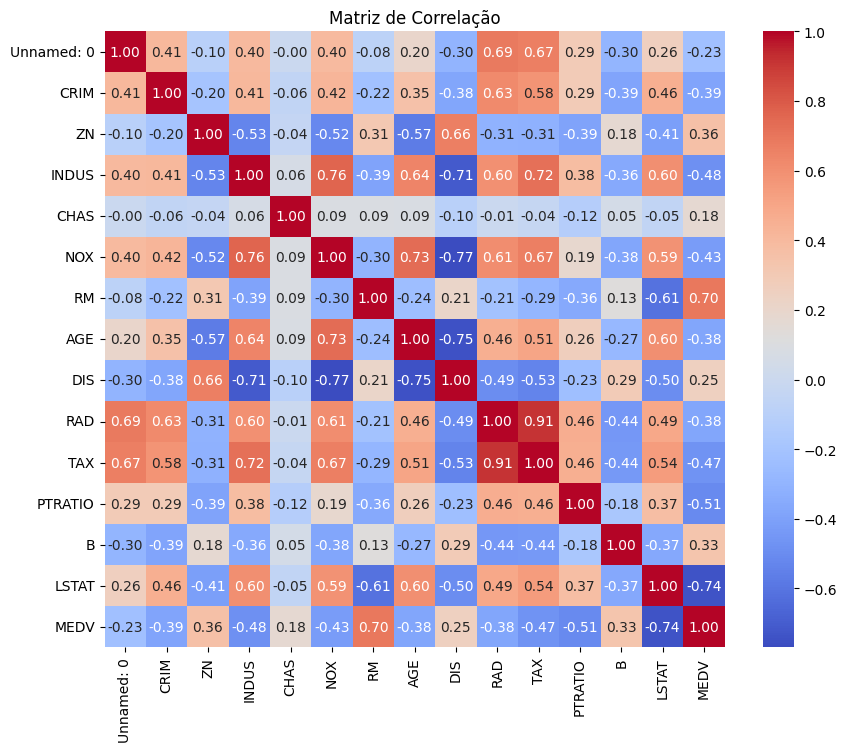

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sets the figure size to 10x8 inches.
# This sets the size of the plotting window for best viewing.
plt.figure(figsize=(10, 8))

# Creates a heatmap using the provided correlation matrix.
# - `correlation_matrix`: Correlation matrix that contains the correlation coefficients between the variables.
# - `annot=True`: Displays numeric values ​​inside the heatmap cells.
# - `fmt=".2f"`: Formats numeric values ​​with two decimal places.
# - `cmap="coolwarm"`: Applies the "coolwarm" colormap, which highlights positive and negative correlations.
# - `cmap="coolwarm"`: Applies the "coolwarm" colormap, which highlights positive and negative correlations. sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Adds a title to the visualization to indicate that it is a correlation matrix.
plt.title("Correlation Matrix")

# Displays the generated graph.
plt.show()

The correlation matrix shows the linear relationships between the numerical variables in the dataset. The values range from -1 to 1, indicating the degree of association between variables:

* **Strong positive correlation (≥ 0.7)**: Variables that increase together.

  * Example: `INDUS` (proportion of non-residential area) has a strong positive relationship with `NOX` (nitric oxide concentration, 0.763651).

* **Strong negative correlation (≤ -0.7)**: Variables that have an inverse relationship.

  * Example: `DIS` (distance to employment centers) and `NOX` have a strong negative relationship (-0.769230).

* **Relationship with `MEDV` (median value of homes)**:

  * **Strong positive**: The variable `RM` (average number of rooms per dwelling) shows a strong positive correlation with `MEDV` (0.695360), indicating that more rooms are associated with higher property values.
  * **Strong negative**: `LSTAT` (percentage of lower status population) has a strong negative relationship with `MEDV` (-0.737663), suggesting that poorer areas tend to have lower property values.

* **Other observations**:

  * `CRIM` (crime rate) has a moderately negative relationship with `MEDV` (-0.388305), indicating that safer areas tend to have more expensive properties.
  * `ZN` (proportion of residential land zoned for large lots) has a moderately positive correlation with `MEDV` (0.360445), suggesting that areas with more residential land tend to have higher property values.

* **Multicollinearity**:

  * There is an extremely strong correlation between `RAD` (index of accessibility to highways) and `TAX` (property tax rate per \$10,000, 0.910228), indicating possible redundancy of these variables in a model.

#### **Conclusão**

Com base na análise da matriz de correlação, observou-se que as variáveis que mais influenciam o valor médio das casas (`MEDV`) são:

- **Positivamente:**
  - `RM`, que representa o número médio de cômodos. Isso indica que casas com mais cômodos tendem a ser mais valorizadas.

- **Negativamente:**
  - `LSTAT`, que reflete o percentual de status inferior na população, mostrando que regiões mais pobres têm casas com valores menores.
  - `NOX` (concentração de óxido nítrico) e `INDUS` (proporção de áreas industriais) também impactam negativamente, sugerindo que áreas mais poluídas ou industriais são menos valorizadas.

Além disso, foi notada uma forte correlação entre algumas variáveis independentes, como `RAD` e `TAX`, indicando **multicolinearidade**. Isso pode prejudicar a interpretação dos modelos preditivos, e, portanto, é importante tratar essas redundâncias, seja eliminando variáveis ou ajustando a análise.

Com essas observações, é possível priorizar as variáveis mais relevantes para um modelo preditivo, focando naquelas que realmente afetam o valor das propriedades.

#### **How ​​Variables Affect Home Values: Positive and Negative Correlation**

When a variable is said to **positively influence** the mean home value (`MEDV`), it means that as the value of that variable increases, the mean home value also tends to increase. For example, in the case of the variable `RM` (mean number of rooms), the more rooms a house has, the higher the mean home value. This indicates a direct, positive correlation between the two variables.

On the other hand, when a variable **levels** the mean home value, it means that as the value of that variable increases, the mean home value tends to decrease. In the case of the variable `LSTAT` (percentage of low socioeconomic status in the population), the higher the percentage of people with low socioeconomic status in the area, the lower the home value. This indicates an inverse, or negative, correlation between the two variables.

These relationships help us understand how different characteristics of an area or home affect the market price of a property. Variables with positive brightness are indicative of factors that increase value, while variables with negative brightness point to factors that may decrease value.

### Scatterplot

Scatterplots are used to visualize the relationship between two continuous variables, allowing the identification of patterns, trends and possible correlations.

**Objectives**:
- Demonstrate how variables are related to each other.
- Assist in the detection of linear or non-linear patterns.
- Identify outliers or atypical values ​​that may influence the analysis.
- Display possible groupings or separations between the data.

In [ ]:
# Defining the constant for the median house price
MEDV = 'Median House Price'
"""
Constant that represents the name of the variable 'Median House Price' in the DataFrame.
This constant is used in the variables to generate titles for the scatter plots.
"""

# List of variables with features for the scatter plots
variables = [
    {'feature':'CRIM', 'title': f'Relationship between Crime Rate and {MEDV}', 'xlabel': 'Crime Rate'},
    {'feature':'ZN', 'title': f'Relationship between Proportion of Residential Land with Large Lots and {MEDV}', 'xlabel': 'Proportion of Residential Land'},
    {'feature': 'INDUS', 'title': f'Relationship between Proportion of Business Acres and {MEDV}', 'xlabel': 'Proportion of Business Acres'},
    {'feature': 'CHAS', 'title': f'Relationship between Dummy Variable Indicating Proximity to Charles River and {MEDV}', 'xlabel': 'Dummy Variable'},
    {'feature': 'NOX', 'title': f'Relationship between Nitric Oxide Concentration and {MEDV}', 'xlabel': 'Nitric Oxide Concentration'},
    {'feature': 'RM', 'title': f'Relationship between Average Number of Rooms and {MEDV}', 'xlabel': 'Average Number of Rooms'},
    {'feature': 'AGE', 'title': f'Relationship between Average Building Age and {MEDV}', 'xlabel': 'Average Building Age'},
    {'feature': 'DIS', 'title': f'Relationship between Average Distance to Employment Centers and {MEDV}', 'xlabel': 'Average Distance to Employment Centers'},
    {'feature': 'RAD', 'title': f'Relationship between Highway Accessibility Index and {MEDV}', 'xlabel': 'Highway Accessibility Index'},
    {'feature': 'TAX', 'title': f'Relationship between Property Tax Rate per $10,000 and {MEDV}', 'xlabel': 'Property Tax Rate per $10,000'},
    {'feature': 'PTRATIO', 'title': f'Relationship between Student-to-Teacher Ratio and {MEDV}', 'xlabel': 'Student-to-Teacher Ratio'},
    {'feature': 'B', 'title': f'Relationship between Business Proportion and {MEDV}', 'xlabel': 'Business Proportion'},
    {'feature': 'LSTAT', 'title': f'Relationship between Percentage of Lower Status Population and {MEDV}', 'xlabel': 'Percentage of Lower Status Population'}
]
"""
List of dictionaries containing information about the variables to be analyzed in the scatter plots. Each dictionary contains:
- 'feature': Name of the variable to be plotted on the X-axis.
- 'title': Title of the generated plot.
- 'xlabel': Label for the X-axis.
This list is used to generate scatter plots between the variables and the median house price (MEDV).
"""

def plot_relationships(df: list, frame=df) -> None:
    """
    Generates scatter plots to observe the relationship between different variables and the median house price (MEDV).

    For each variable defined in the `variables` list, a scatter plot is generated where:
    - The X-axis represents the variable specified in 'feature'.
    - The Y-axis represents the 'Median House Price' (MEDV).
    - The title and X-axis label are dynamic and based on the information in each dictionary in the `variables` list.

    Parameters:
    df (list): List containing the data for the variables and MEDV. The expected data type is a DataFrame.
    frame (optional): An additional argument that is also a DataFrame, used instead of `df` if needed. This parameter is optional and defaults to `df`.

    Example:
    >>> plot_relationships(df)  # Calls the function with the DataFrame df

    The generated plots will display the correlation between the specified variables and the median house price.
    """
    # Iterating over the variables to generate the plots
    for variable in variables:
        sns.scatterplot(x=variable['feature'], y='MEDV', data=frame)
        plt.title(variable['title'])
        plt.xlabel(variable['xlabel'])
        plt.show()

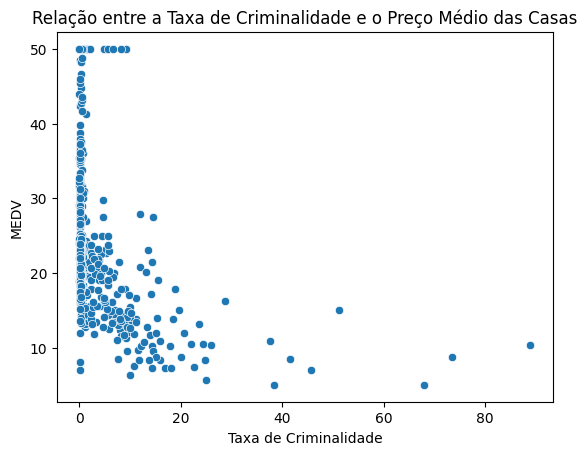

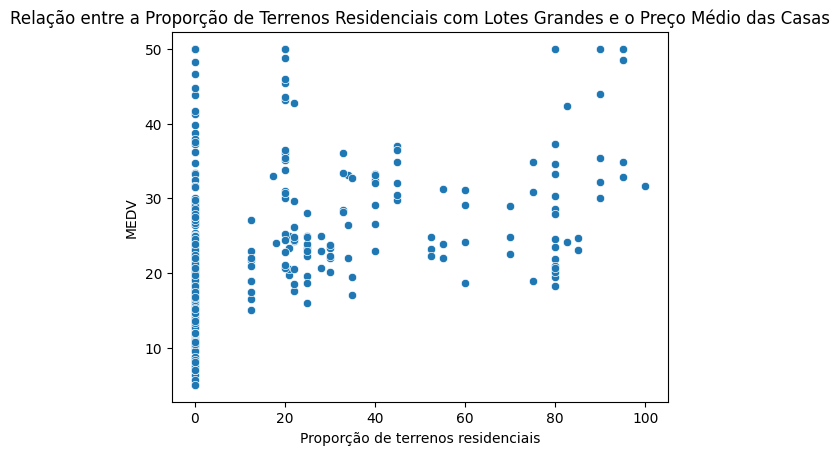

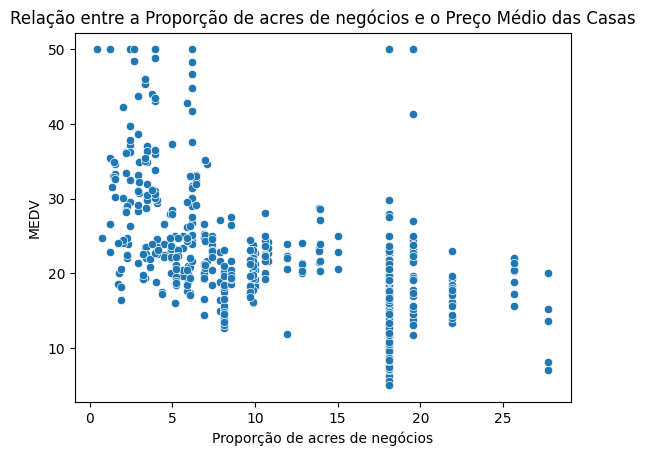

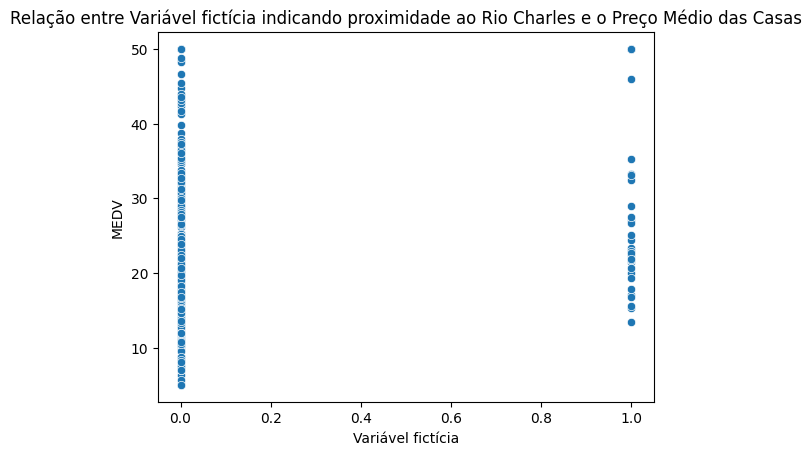

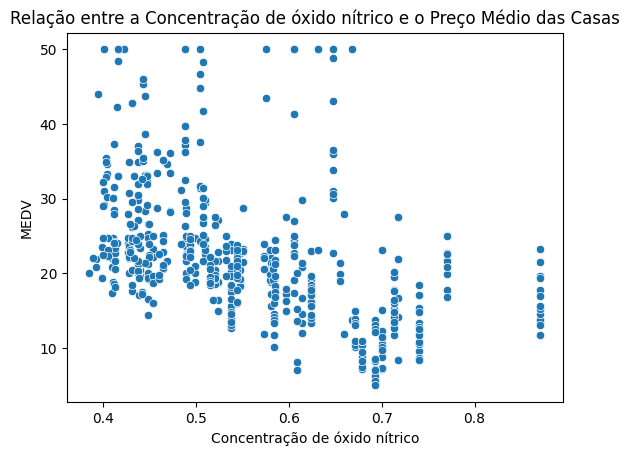

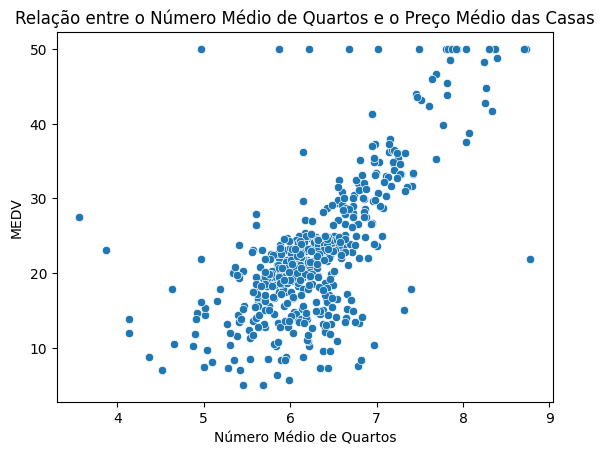

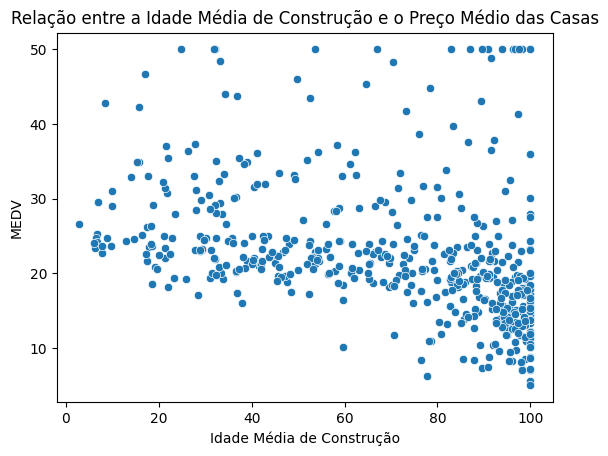

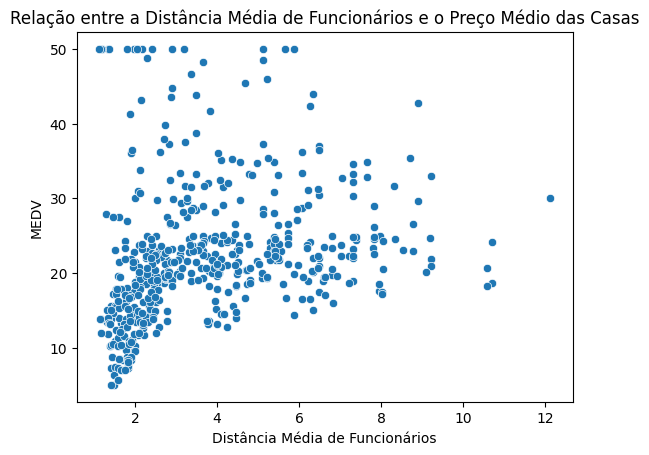

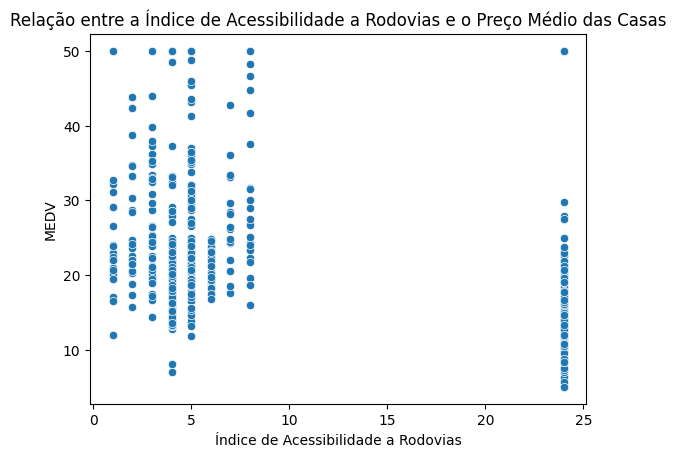

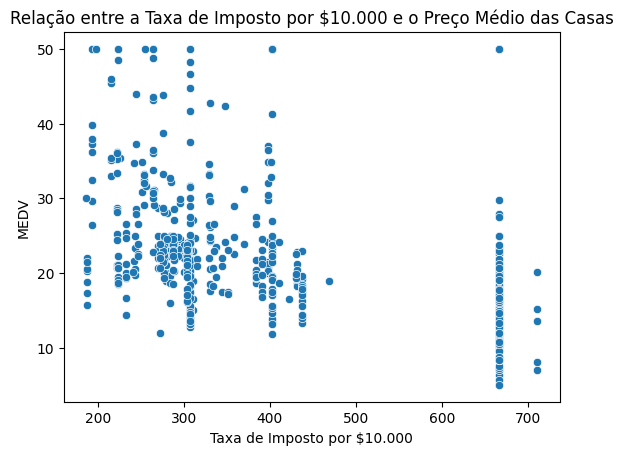

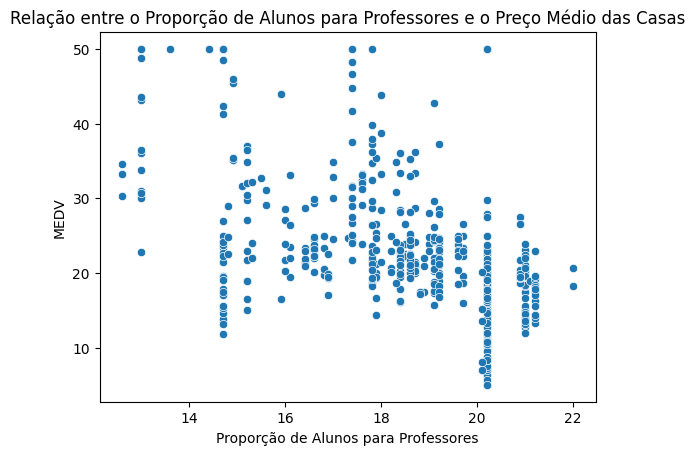

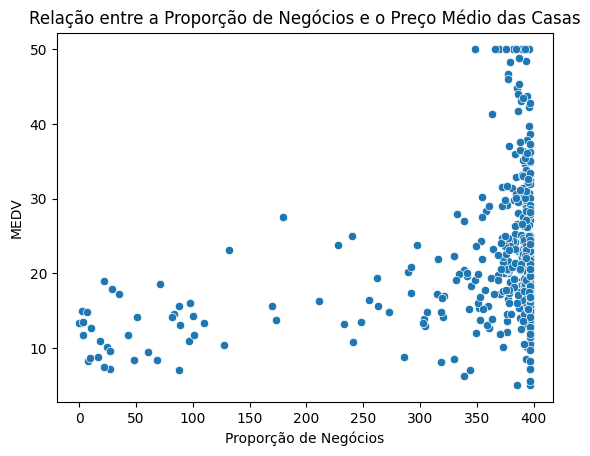

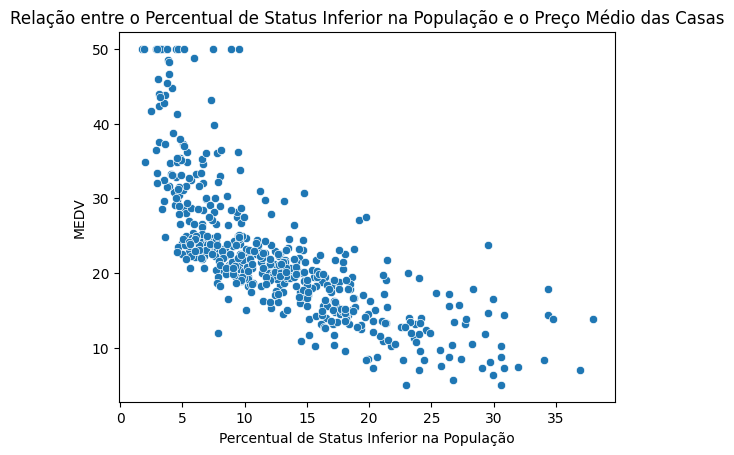

In [ ]:
plot_relationships(variables)

## Data preprocessing

### Outlier Detection and Removal

An Isolation Forest algorithm is used to detect outliers in the dataset. The outliers are then removed to obtain an anomaly-free DataFrame.

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Creating an instance of the IsolationForest model
ifo = IsolationForest()
"""
Creates an instance of the IsolationForest model from the scikit-learn library.
IsolationForest is an unsupervised machine learning algorithm used to detect outliers in a dataset.
"""

# Fits the model with the input data (df)
ifo.fit(df)
"""
Fits the IsolationForest model to the data provided in the `df` DataFrame.
The model learns the patterns in the data and identifies which observations are considered normal and which are considered outliers.
Parameter:
    df (pandas.DataFrame): The DataFrame containing the data to be analyzed, where each row represents a sample and each column represents a variable.
"""

# Outlier prediction: 1 for normal, -1 for outlier
outliers = ifo.predict(df)
"""
Performs prediction using the trained model, returning an array with values indicating whether each sample is normal (1) or an outlier (-1).
The `predict` method returns an array of values, where:
    1 indicates that the sample is normal.
    -1 indicates that the sample is an outlier.
Parameter:
    df (pandas.DataFrame): The input DataFrame used for prediction.
Return:
    outliers (numpy.ndarray): Array with values 1 and -1, representing normal samples and outliers, respectively.
"""

# Combines the prediction result with the original data
df_without_outliers = pd.concat([pd.DataFrame(outliers), df], axis=1)
"""
Combines the outliers array with the original DataFrame `df`. The result is a new DataFrame with the outliers column (1 or -1) to the left of the original columns.
This resulting DataFrame makes it easier to separate normal samples from outliers.
Parameter:
    outliers (numpy.ndarray): Array of outlier predictions generated by the model.
    df (pandas.DataFrame): The original DataFrame containing the data.
Return:
    df_without_outliers (pandas.DataFrame): New DataFrame containing the original columns from `df` and the outliers column.
"""

# Filters normal samples (value 1) and removes samples considered outliers (value -1)
df = df_without_outliers[df_without_outliers.iloc[:, 0] == 1]
"""
Filters the `df_without_outliers` DataFrame to keep only the rows where the outliers column has the value 1 (normal).
This removes the rows that are considered outliers (value -1).
Parameter:
    df_without_outliers (pandas.DataFrame): DataFrame containing the original data and the outlier prediction column.
Return:
    df (pandas.DataFrame): Final DataFrame with only normal samples, with outliers removed.
"""

'\nFiltra o DataFrame `df_without_outliers` para manter apenas as linhas onde a coluna de outliers possui o valor 1 (normal). \nIsso remove as linhas que são consideradas outliers (valor -1).\nParâmetro:\n    df_without_outliers (pandas.DataFrame): DataFrame contendo os dados originais e a coluna com as previsões de outliers.\nRetorno:\n    df (pandas.DataFrame): DataFrame final com as amostras normais, onde os outliers foram removidos.\n'

### Splitting data into features and targets

The DataFrame is split into independent variables (features) and the dependent variable (target).

In [ ]:
X = df.drop(['MEDV', 'TAX', 'Unnamed: 0'], axis=1)
y = df['MEDV']

**Treatment of Multicollinearity between the Variables 'RAD' and 'TAX'**

In this case, multicollinearity between the variables 'RAD' and 'TAX' was addressed by removing the variable 'RAD' from the data set, given that the correlation between the two variables was very high (0.91). This action was taken to avoid instability in the coefficients of the linear regression model, which could be caused by collinearity between these variables. Thus, the variable 'TAX' was kept in the model, and 'RAD' was discarded, allowing for a more accurate and stable analysis.

### Split data into training (80%) and testing (20%)

This script splits the data into training and testing sets using the `train_test_split` function of `scikit-learn`. The variable `X` contains the features of the data, while `y` contains the labels. The data is split into 80% for training and 20% for testing (`test_size=0.2`), with a fixed random seed (`random_state=42`) to ensure reproducibility. After splitting, the column names of `X_train` and `X_test` are converted to the `str` type to ensure consistency in data manipulation.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

### Normalization of Training and Test Data

The data is normalized using scikit-learn's StandardScaler. StandardScaler is used to standardize the features, ensuring that each variable has a mean of 0 and a standard deviation of 1. First, the fit_transform method is applied to the training data (X_train), adjusting the scaling based on the features of the training set and transforming the data. Then, the transform method is used to scale the test data (X_test) with the same parameters obtained from the training set. This ensures that the transformation is consistent across data sets.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training

### Linear Regression Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Linear Regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train, y_train)

LinearRegression()

### Model predictions and evaluation

In [ ]:
# Making predictions with the trained model
y_pred = model.predict(X_test)

# Evaluating the model's performance
# Displays the coefficients of the linear regression model
print("Coefficients:", model.coef_)

# Displays the intercept of the linear regression model
print("Intercept:", model.intercept_)

# Calculates and displays the Mean Squared Error (MSE), which indicates the average of the squared errors
# The smaller the value, the better the model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

# Calculates and displays the R² Score, which indicates the proportion of data variability explained by the model
# The R² value ranges from 0 to 1, and the closer to 1, the better the model
print("R² Score:", r2_score(y_test, y_pred))

Coeficientes: [ 0.         -0.87137156 -0.01455785 -0.60940568  0.23725349 -1.5657151
  2.11574421 -0.05160697 -2.06876352  1.07134817 -1.55145359  0.85736037
 -3.17525097]
Intercepto: 21.579351032448372
Erro quadrático médio (MSE): 10.394455624461253
R² Score: 0.7709087647972689


### Conclusion

From the evaluation of the linear regression model, we observed the following important points:

1. **Coefficients and Intercept**: The coefficients indicate the influence of each independent variable on the dependent variable (average house price). For example, some variables have negative coefficients, indicating an inverse relationship with the average price, while others have positive coefficients, suggesting a direct relationship.

3. **Mean Squared Error (MSE)**: The MSE value is 9.24, which indicates that, on average, the difference between the actual values ​​and those predicted by the model is about 9.24 square units. This value suggests that the model has a considerable, but not excessively large, margin of error.

4. **R² Score**: The R² value of 0.79 is quite good, indicating that approximately 79% of the variation in house prices can be explained by the independent variables in the model. This suggests that the model is capturing the relationship between the variables and the average price well, although there is room for improvement.

In summary, the linear regression model performed reasonably well, with a high R², which implies that it explains the variability in the data well. However, the MSE indicates that there is still considerable error, suggesting that the model could be improved, possibly by incorporating more variables or using other modeling techniques.